# Numerical Analysis of Quicksort Pivot Selection Strategies

## Goal of this Exercise

The goal of this exercise is to run numerical simulations of sampling triplets from a numerical array and figuring out what the expected probability of picking a good Quicksort pivot value should be.

(I also have a personal goal of learning more about computational statistics and data analysis, because I am interested in it.)

### Some Notes Before my Code

I am going to define a "good" pivot as one that falls in the middle 50% of the distribution of elements in the array. This is because those values should be fairly close to the median value of the array, which should split the array roughly in half as a pivot.

I would guess that for an arbitrary, uniformly-random array of numbers, about half of the elements would be considered "good" pivots, because that many would be in the middle 50% of the distribution.

I'm going to let the event G be the event that the element is a good pivot, and the event N be the event that it is not. With my definition of a "good" pivot, the probability of any element being a good pivot is given by $P(G) = \frac{1}{2}$ and, since the element is either good or it's not, the probability that it is not is given by $P(N) = 1 - P(G) = \frac{1}{2}$. These probabilities apply to all elements.

Therefore, the probability of having the first element of the array be a good pivot is $\frac{1}{2}$, assuming the array is random. 

If picking three elements at random from the array, there are $2^3$ or 8 possible outcomes, in terms of whether each of them individually are good pivots or not:

${(G, G, G), (N, G, G), (G, N, G), (G, G, N), (N, N, G), (N, G, N), (G, N, N), (N, N, N)}$

The probabilities of having a certain amount of good pivots, using the above set:

| Number of good pivots | Probability |
| --- | --- |
| 0 | $\frac{1}{8} = 12.5$ % |
| 1+ | $\frac{7}{8} = 87.5$ % |
| 2+ | $\frac{4}{8} = 50$ % |
| 3 | $\frac{1}{8} = 12.5$ % |

I'm not sure how to calculate the exact theoretical probability of having the median of any of those orderings be a good pivot, but I would imagine it falls between 50% and 87.5%. 

Either way, that value (representing the probability that the median of three is a good pivot) is higher than the probability of picking one random element and hoping it is a good pivot. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Seed for reproducibility
np.random.seed(42)

arr = np.random.randint(100, size=1000)

# Elements deemed a "good" pivot will fall in the middle 50% of values (between the 25th and 75th percentiles)
q25, q75 = np.percentile(arr, [25, 75])

condition = (arr >= q25) & (arr <= q75)

good_pivots = arr[condition]

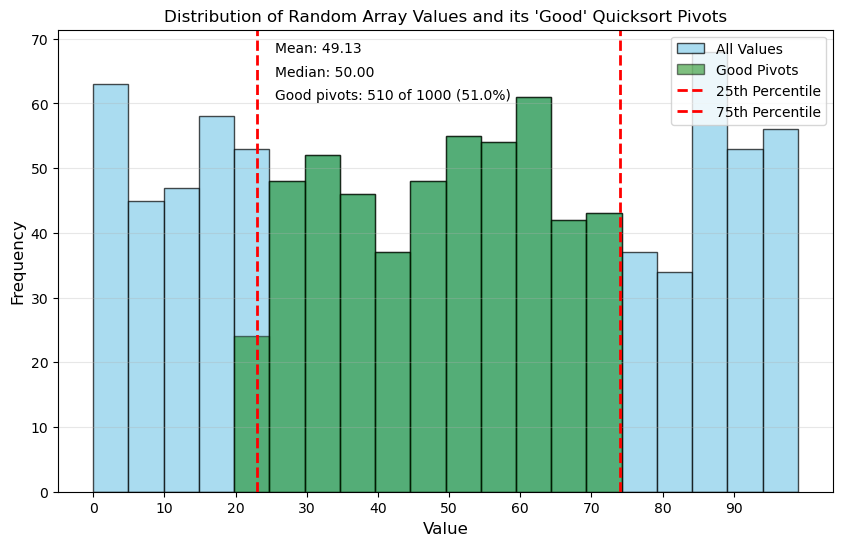

In [54]:
# Show distribution of values in random array

plt.figure(figsize=(10, 6))

# Plot histogram
n, bins, patches = plt.hist(arr, bins=20, alpha=0.7, color="skyblue", edgecolor="black", linewidth=1, label="All Values")

# Overlay good pivots with different color
plt.hist(good_pivots, bins=bins, alpha=0.5, color="green", edgecolor="black", linewidth=1, label="Good Pivots")

# Add vertical lines for quartiles
plt.axvline(q25, color="red", linestyle="dashed", linewidth=2, label="25th Percentile")
plt.axvline(q75, color="red", linestyle="dashed", linewidth=2, label="75th Percentile")

# Labels
plt.title("Distribution of Random Array Values and its 'Good' Quicksort Pivots")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(np.arange(0, 100, 10))

# Add grid for better readability
plt.grid(axis="y", alpha=0.3)

# Add legend
plt.legend()

# Show mean and median in text
x = 0.28
plt.annotate(f"Mean: {arr.mean():.2f}", xy=(x, 0.95), xycoords="axes fraction", fontsize=10)
plt.annotate(f"Median: {np.median(arr):.2f}", xy=(x, 0.9), xycoords="axes fraction", fontsize=10)
plt.annotate(f"Good pivots: {len(good_pivots)} of {len(arr)} ({100 * len(good_pivots) / len(arr):.1f}%)", xy=(x, 0.85), xycoords="axes fraction", fontsize=10)
plt.show()

In [55]:
def median_of_three(arr):
    triplet = np.random.choice(arr, size=3, replace=False)
    
    return np.median(triplet)

In [56]:

medians = []

# Carry out Median-of-Three procedure 10,000 times
for i in range(10000):
    m = median_of_three(arr)
    medians.append(m)

medians = np.array(medians)

q25, q75 = np.percentile(arr, [25, 75])
condition = (arr >= q25) & (arr <= q75)

good_medians = medians[(medians >= q25) & (medians <= q75)]
num_good_medians = len(good_medians)

print(f"Number of good median-of-three values: {num_good_medians} out of 10,000: {num_good_medians * 100 / len(medians)}%")

Number of good median-of-three values: 7041 out of 10,000: 70.41%


## Conclusion

After simulating the Median-of-Three procedure 10,000 times, I have concluded that the expected value for the probability of the Median-of-Three value being a "good" pivot is about 70%. This result indeed lies in the range I predicted, which was between 50% and 87.5%, and it is pretty close to being in the middle of it.

However, I only tested this simulation on one randomly-generated array of 1,000 elements with each element existing in the range $[0, 100)$, because the numbers were easy to work with. There are obviously a lot of other types of arrays to try this simulation on, and in reality, 1,000 elements and 10,000 iterations are both not super high when it comes to nailing down a solid probability estimation. There can also be some weird arrays to try with elements being very narrowly or widely distributed, elements already being sorted to start with, a worst-case massive array, almost-sorted array, and so on.

That being said, I feel that this exercise has given a fair amount of insight on how much better the Median-of-Three procedure is when it comes to picking a good pivot for the Quicksort algorithm than simply picking the first element of the array. After all, a 70% chance of picking a good pivot at each step of Quicksort is definitely better than 50%. Depending on the array, the runtime can be improved a fair amount.